In [1]:
import sqlite3
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('words.db')
cur = conn.cursor()

In [3]:
df = pd.read_sql_query('''
            select pos_tag_lemma.word, GROUP_CONCAT(pos, ', ')
            from pos_tag_lemma
            join main on main.word = pos_tag_lemma.word
            where pos_tag_lemma.pos is not null
            group by pos_tag_lemma.word
            order by freq DESC''', conn)
df = df.rename(columns={"GROUP_CONCAT(pos, ', ')":"pos"})

In [4]:
for index, row in df.iterrows():
    p = row['pos'].split()[0]
    p = p.rstrip(',')
    row['pos'] = p

In [5]:
list_of_pos = ['NOUN', 'ADJF', 'ADJS', 'COMP', 'VERB', 'INFN', 
               'PRTF', 'PRTS', 'GRND', 'NUMR', 'ADVB', 'NPRO', 
               'PRED', 'PREP', 'CONJ', 'PRCL', 'INTJ']

In [6]:
colors = ['#4DD0E1', '#4DB6AC', '#81C784', '#AED581', 
          '#FFF176', '#FFD54F', '#FFB74D', '#FF8A65', 
          '#A1887F', '#E0E0E0', '#90A4AE', '#E53935', 
          '#8E24AA', '#3949AB', '#039BE5', '#00897B', 
          '#7CB342', '#FDD835', '#FB8C00']

In [7]:
def fill_dict_1(df, list_of_pos):
    u = {key: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for key in list_of_pos}
    for i in range(10):
        working_df = df[1000*i:1000*(i+1)+1]
        cnt_pos = Counter(working_df['pos'])
        for el in cnt_pos.keys():
            u[el][i] = cnt_pos[el]
    return u

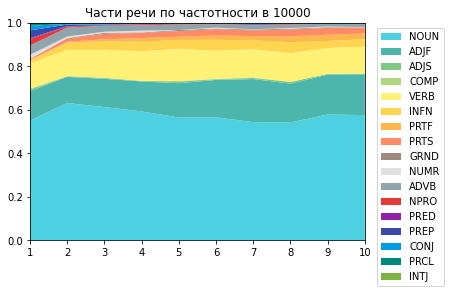

In [8]:
u = fill_dict_1(df, list_of_pos)
data = pd.DataFrame(u)

data_perc = data.divide(data.sum(axis=1), axis=0)

list_of_percs = [data_perc['NOUN'],  data_perc['ADJF'],  
                 data_perc['ADJS'], data_perc['COMP'], 
                 data_perc['VERB'], data_perc['INFN'], 
                 data_perc['PRTF'], data_perc['PRTS'], 
                 data_perc['GRND'], data_perc['NUMR'], 
                 data_perc['ADVB'], data_perc['NPRO'],
                 data_perc['PRED'], data_perc['PREP'],
                 data_perc['CONJ'], data_perc['PRCL'],
                 data_perc['INTJ']]


plt.stackplot(range(1,11), list_of_percs, labels=list_of_pos, colors=colors)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.margins(0,0)
plt.title('Части речи по частотности в 10000')
plt.show()

## Уменьшим количество частей речи

In [9]:
shorter_of_pos = ['NOUN', 'ADJ', 'VERB', 'NUMR', 'ADVB', 'FUNC']

In [10]:
def fill_dict_3(df, shorter_of_pos):
    u = {key: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for key in shorter_of_pos}
    for i in range(10):
        working_df = df[1000*i:1000*(i+1)+1]
        cnt_pos = Counter(working_df['pos'])
        for el in cnt_pos.keys():
            if el in ['ADJF', 'ADJS', 'NPRO', 'PRTF', 'PRTS']:
                u['ADJ'][i] += cnt_pos[el]
            elif el in ['ADVB', 'PRED', 'COMP', 'GRND', 'INFN']:
                u['ADVB'][i] += cnt_pos[el]
            elif el in ['PREP', 'INTJ', 'CONJ', 'PRCL']:
                u['FUNC'][i] += cnt_pos[el]
            else:
                u[el][i] += cnt_pos[el]
    return u

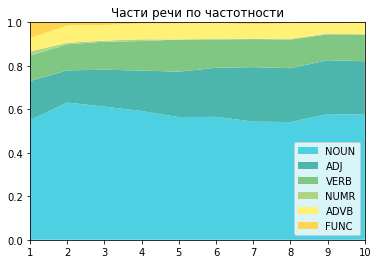

In [11]:
u = fill_dict_3(df, shorter_of_pos)
data = pd.DataFrame(u)

data_perc = data.divide(data.sum(axis=1), axis=0)

list_of_percs = [data_perc['NOUN'], data_perc['ADJ'],  
                 data_perc['VERB'], data_perc['NUMR'], 
                 data_perc['ADVB'], data_perc['FUNC']]


plt.stackplot(range(1,11), list_of_percs, labels=shorter_of_pos, colors=colors)
plt.legend(loc='lower right')
plt.margins(0,0)
plt.title('Части речи по частотности')
plt.show()

## То же самое по сотням в первой тысяче

In [12]:
def fill_dict_4(df, shorter_of_pos):
    u = {key: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for key in shorter_of_pos}
    for i in range(10):
        working_df = df[100*i:100*(i+1)+1]
        cnt_pos = Counter(working_df['pos'])
        for el in cnt_pos.keys():
            if el in ['ADJF', 'ADJS', 'NPRO', 'PRTF', 'PRTS']:
                u['ADJ'][i] += cnt_pos[el]
            elif el in ['ADVB', 'PRED', 'COMP', 'GRND', 'INFN']:
                u['ADVB'][i] += cnt_pos[el]
            elif el in ['PREP', 'INTJ', 'CONJ', 'PRCL']:
                u['FUNC'][i] += cnt_pos[el]
            else:
                u[el][i] += cnt_pos[el]
    return u

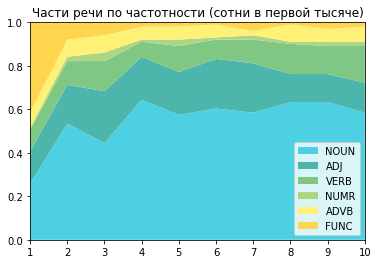

In [13]:
u = fill_dict_4(df, shorter_of_pos)
data = pd.DataFrame(u)

data_perc = data.divide(data.sum(axis=1), axis=0)

list_of_percs = [data_perc['NOUN'], data_perc['ADJ'],  
                 data_perc['VERB'], data_perc['NUMR'], 
                 data_perc['ADVB'], data_perc['FUNC']]


plt.stackplot(range(1,11), list_of_percs, labels=shorter_of_pos, colors=colors)
plt.legend(loc='lower right')
plt.margins(0,0)
plt.title('Части речи по частотности (сотни в первой тысяче)')
plt.show()